# Classification through statistical learning
(Logistic Regression, KNN, SVM, Naive Bayes, RandomForest)

#### Import packages 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
plt.style.use('seaborn-poster')

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#### Load prepared data set 

In [3]:
import data_formatter

data_set = pd.read_csv("prepared_dataset.csv")

#### Consider features only from the current event for now 

In [4]:
nb_events_as_features = 1

X, y = data_formatter.prepare_data_set(data_set, nb_events_as_features)

#### Train, validation, test split for simple algorithms comparison

Note that we can't use cross validation given the temporality of the data.

Cross validation would introduce *future bias* 

In [21]:
proportion_train = 0.8
proportion_validation = 0.1

cut_train = round(X.shape[0] * proportion_train)
cut_validation = round(X.shape[0] * (proportion_train + proportion_validation))

X_train, y_train = X.iloc[:cut_train,:], y.iloc[:cut_train]
X_validation, y_validation = X.iloc[cut_train:cut_validation,:], y.iloc[cut_train:cut_validation]
X_test, y_test = X.iloc[cut_validation:,:], y.iloc[cut_validation:]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

Before applying the algorithms, let's define some helper functions.

Those functions will be called often to print metrics on predicted classes

and print predicted probabilities (for the logistic regression and naive bayes methods)

In [22]:
def print_metrics(y_theoric, y_predicted):
    confusion_matrix = metrics.confusion_matrix(y_theoric, y_predicted)
    print('Confusion matrix: \n {}'.format(confusion_matrix))
    print('{:15}: {:>12}'.format('Null accuracy', y_theoric.value_counts()[0] / len(y_theoric)))
    print('{:15}: {:>12}'.format('Accuracy', metrics.accuracy_score(y_theoric, y_predicted)))
    print('{:15}: {:>12}'.format('Error', 1 - metrics.accuracy_score(y_theoric, y_predicted)))
    print('{:15}: {:>12}'.format('Sensitivity', confusion_matrix[1,1] / (confusion_matrix[1,1] + confusion_matrix[1,0]) ))
    print('{:15}: {:>12}'.format('Specificity', confusion_matrix[0,0] / (confusion_matrix[0,0] + confusion_matrix[0,1]) ))
    # print(metrics.recall_score(y_validation, y_validation_pred_class))
    

def plot_predicted_probabilities(y_lr_validation_pred_prob):
    plt.hist(y_lr_validation_pred_prob, bins=20)
    plt.xlim(0, 1)
    plt.title('Histogram of predicted probabilities')
    plt.xlabel('Predicted probability of up move')
    plt.ylabel('Frequency')
    plt.show()

#### Logistic regression 

In [23]:
lr_model = LogisticRegression(penalty='l2', C=1)
%timeit lr_model.fit(X_train, y_train)
y_lr_validation_pred_class = lr_model.predict(X_validation)

1 loop, best of 3: 714 ms per loop


#### Print metrics to compare algortihms 

In [24]:
print_metrics(y_validation, y_lr_validation_pred_class)

Confusion matrix: 
 [[962 487]
 [560 746]]
Null accuracy  : 0.5259528130671506
Accuracy       : 0.6199637023593466
Error          : 0.3800362976406534
Sensitivity    : 0.5712098009188361
Specificity    : 0.6639061421670117


####  Predicted probabilities to see if tweaking the threshold is interesting 

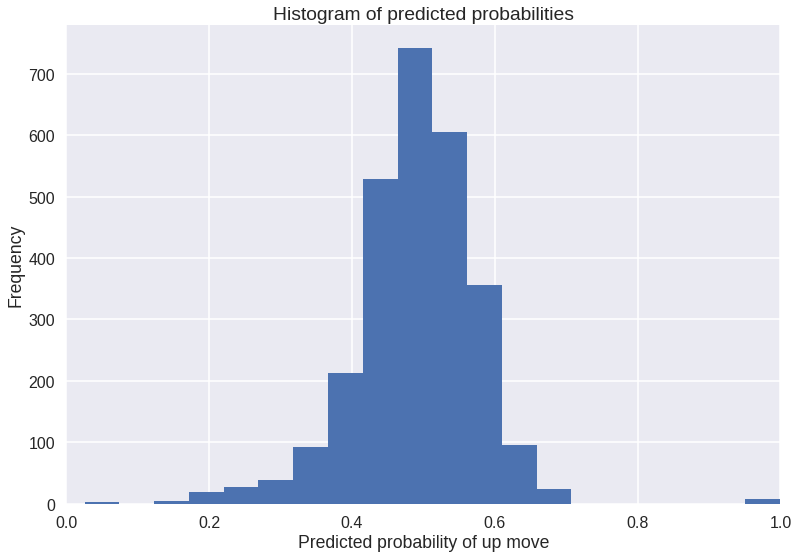

In [25]:
y_lr_validation_pred_prob = lr_model.predict_proba(X_validation)[:, 1]
plot_predicted_probabilities(y_lr_validation_pred_prob)

#### KNN 

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
%timeit knn_model.fit(X_train, y_train)
y_knn_validation_pred_class = knn_model.predict(X_validation)

10 loops, best of 3: 78.2 ms per loop


#### Print metrics to compare algortihms 

In [27]:
print_metrics(y_validation, y_knn_validation_pred_class)

Confusion matrix: 
 [[860 589]
 [594 712]]
Null accuracy  : 0.5259528130671506
Accuracy       : 0.5705989110707804
Error          : 0.4294010889292196
Sensitivity    : 0.5451761102603369
Specificity    : 0.5935127674258109


####  Predicted probabilities to see if tweaking the threshold is interesting 

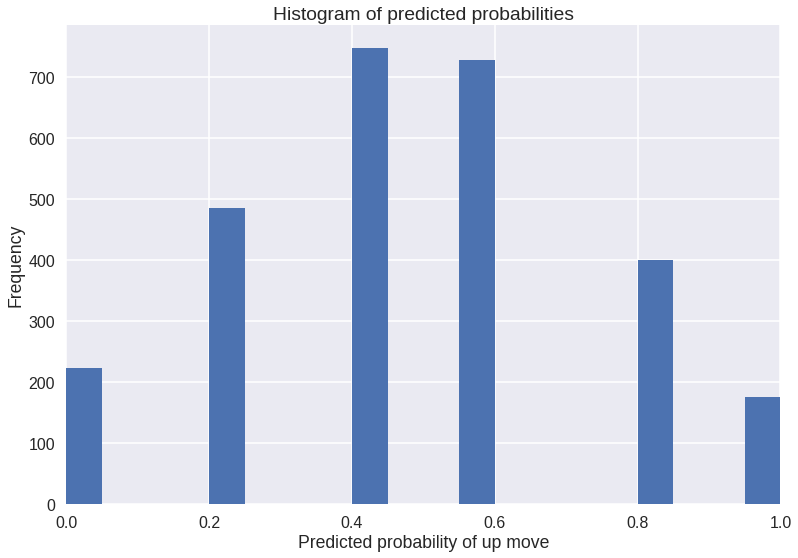

In [28]:
y_knn_validation_pred_prob = knn_model.predict_proba(X_validation)[:, 1]
plot_predicted_probabilities(y_knn_validation_pred_prob)

#### SVM 

In [46]:
import time 
# can't use %timeit locally, SVM too long, maybe on GCP

svm_model = SVC(C=1, kernel='rbf')

start = time.time()
svm_model.fit(X_train, y_train)
print(str(time.time() - start))

y_svm_validation_pred_class = svm_model.predict(X_validation)

47.564887285232544


#### Print metrics to compare algortihms 

In [47]:
print_metrics(y_validation, y_svm_validation_pred_class)

Confusion matrix: 
 [[815 634]
 [374 932]]
Null accuracy  : 0.5259528130671506
Accuracy       : 0.6341197822141561
Error          : 0.3658802177858439
Sensitivity    : 0.7136294027565084
Specificity    : 0.5624568668046929


#### Naive Bayes 

In [29]:
gnb_model = GaussianNB()
%timeit gnb_model.fit(X_train, y_train)
y_gnb_validation_pred_class = gnb_model.predict(X_validation)

100 loops, best of 3: 12.7 ms per loop


#### Print metrics to compare algortihms 

In [30]:
print_metrics(y_validation, y_gnb_validation_pred_class)

Confusion matrix: 
 [[737 712]
 [489 817]]
Null accuracy  : 0.5259528130671506
Accuracy       : 0.5640653357531761
Error          : 0.4359346642468239
Sensitivity    : 0.6255742725880551
Specificity    : 0.5086266390614217


####  Predicted probabilities to see if tweaking the threshold is interesting 

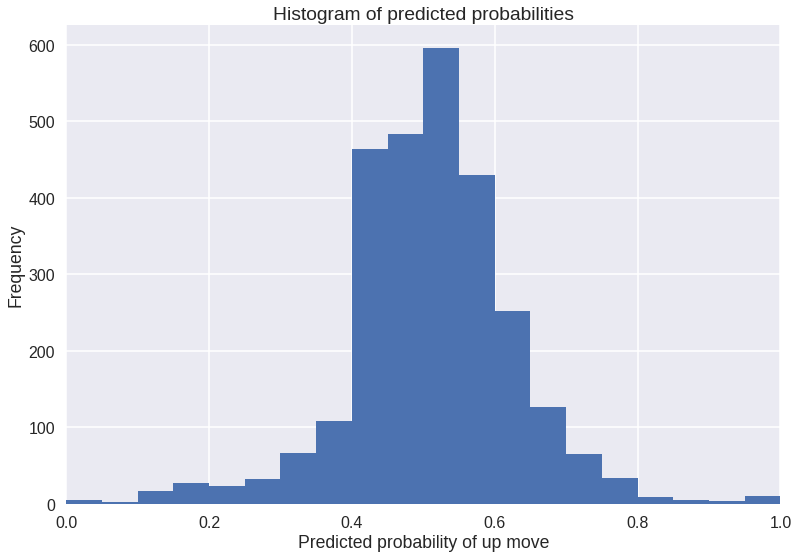

In [31]:
y_gnb_validation_pred_prob = gnb_model.predict_proba(X_validation)[:, 1]
plot_predicted_probabilities(y_gnb_validation_pred_prob)

#### Random Forest

In [32]:
rf_model = RandomForestClassifier()
%timeit rf_model.fit(X_train, y_train)
y_rf_validation_pred_class = rf_model.predict(X_validation)

1 loop, best of 3: 708 ms per loop


#### Print metrics to compare algortihms 

In [33]:
print_metrics(y_validation, y_rf_validation_pred_class)

Confusion matrix: 
 [[904 545]
 [486 820]]
Null accuracy  : 0.5259528130671506
Accuracy       : 0.6257713248638839
Error          : 0.37422867513611613
Sensitivity    : 0.6278713629402757
Specificity    : 0.6238785369220152


####  Predicted probabilities to see if tweaking the threshold is interesting 

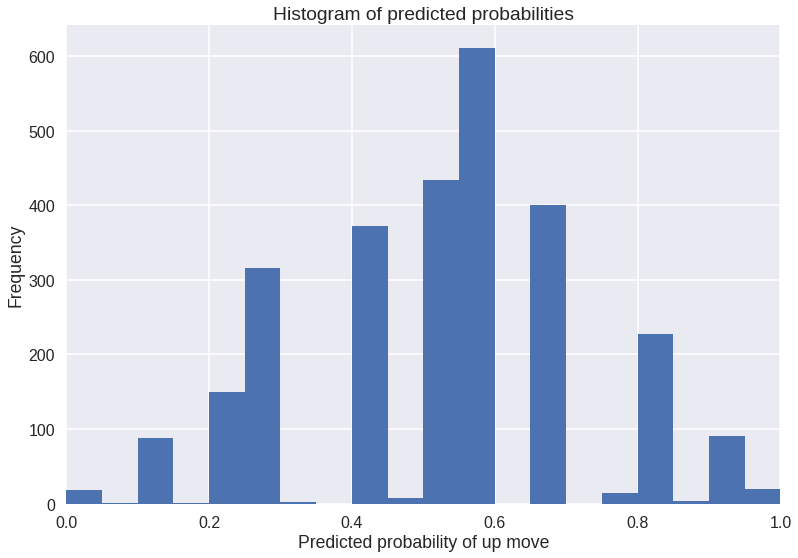

In [34]:
y_rf_validation_pred_prob = rf_model.predict_proba(X_validation)[:, 1]
plot_predicted_probabilities(y_rf_validation_pred_prob)

In [35]:
y_lr_test_pred_class = lr_model.predict(X_test)
print_metrics(y_test, y_lr_test_pred_class)

Confusion matrix: 
 [[695 622]
 [575 864]]
Null accuracy  : 0.47786647314949204
Accuracy       : 0.5656748911465893
Error          : 0.4343251088534107
Sensitivity    : 0.6004169562195969
Specificity    : 0.527714502657555


In [36]:
y_knn_test_pred_class = knn_model.predict(X_test)
print_metrics(y_test, y_knn_test_pred_class)

Confusion matrix: 
 [[689 628]
 [696 743]]
Null accuracy  : 0.47786647314949204
Accuracy       : 0.5195936139332366
Error          : 0.48040638606676345
Sensitivity    : 0.5163307852675469
Specificity    : 0.5231586940015186


In [48]:
y_svm_test_pred_class = svm_model.predict(X_test)
print_metrics(y_test, y_svm_test_pred_class)

Confusion matrix: 
 [[ 513  804]
 [ 313 1126]]
Null accuracy  : 0.47786647314949204
Accuracy       : 0.5947024673439768
Error          : 0.4052975326560232
Sensitivity    : 0.7824878387769284
Specificity    : 0.3895216400911162


In [40]:
y_gnb_test_pred_class = gnb_model.predict(X_test)
print_metrics(y_test, y_gnb_test_pred_class)

Confusion matrix: 
 [[ 383  934]
 [ 278 1161]]
Null accuracy  : 0.47786647314949204
Accuracy       : 0.5602322206095791
Error          : 0.4397677793904209
Sensitivity    : 0.8068102849200834
Specificity    : 0.29081245254365984


In [39]:
y_rf_test_pred_class = rf_model.predict(X_test)
print_metrics(y_test, y_rf_test_pred_class)

Confusion matrix: 
 [[701 616]
 [649 790]]
Null accuracy  : 0.47786647314949204
Accuracy       : 0.5410014513788098
Error          : 0.45899854862119016
Sensitivity    : 0.5489923558026407
Specificity    : 0.5322703113135915
